In [1]:
import pandas as pd 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_json("Sarcasm_Headlines_Dataset (1).json", lines=True )

In [3]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [5]:
df.isna().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [6]:
df.is_sarcastic.unique()

array([1, 0], dtype=int64)

In [7]:
df.dtypes

is_sarcastic     int64
headline        object
article_link    object
dtype: object

In [8]:
df.describe()

,is_sarcastic
count,28619.000000
mean,0.476397
std,0.499451
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Performing feature engineering to draw out new column 'Source' from existing column 'article_link'

In [9]:
df['source'] = df.article_link.apply(lambda x: x.split('.')[1])
df = df.drop('article_link', axis=1)
df.shape

(28619, 3)

In [10]:
df.head(2)

,is_sarcastic,headline,source
0,1,thirtysomething scientists unveil doomsday clo...,theonion
1,0,dem rep. totally nails why congress is falling...,huffingtonpost


In [11]:
df.source.unique()

array(['theonion', 'huffingtonpost'], dtype=object)

Text(0.5, 0, 'Target')

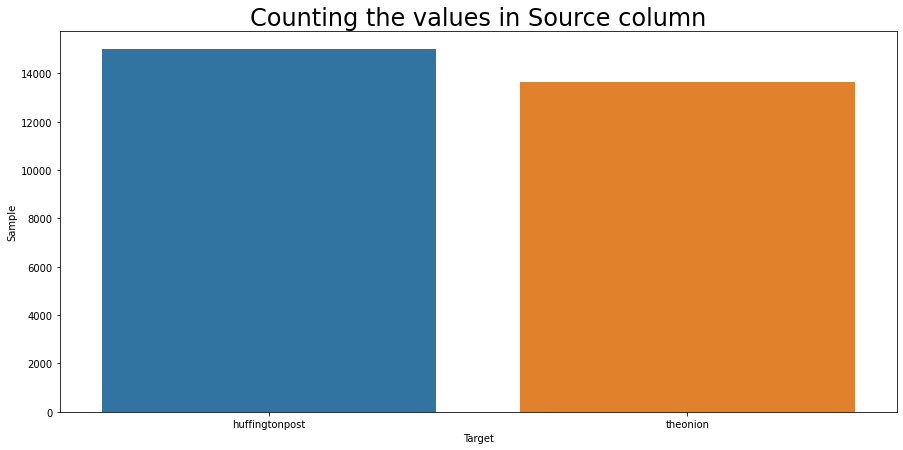

In [12]:
target_counts=df['source'].value_counts()
plt.figure(figsize = (15,7))
sns.barplot(y=target_counts,x=target_counts.index)
plt.title("Counting the values in Source column",fontsize = 24)
plt.ylabel('Sample')
plt.xlabel('Target')

In [13]:
all_words = df['headline'].str.split(expand=True).unstack().value_counts()
all=pd.DataFrame(all_words).reset_index()
all_words

to               9045
of               6252
the              5281
in               4521
for              3617
                 ... 
couples'            1
robbins/pizza       1
breathalyzer        1
fictitious          1
leonard,            1
Length: 38234, dtype: int64

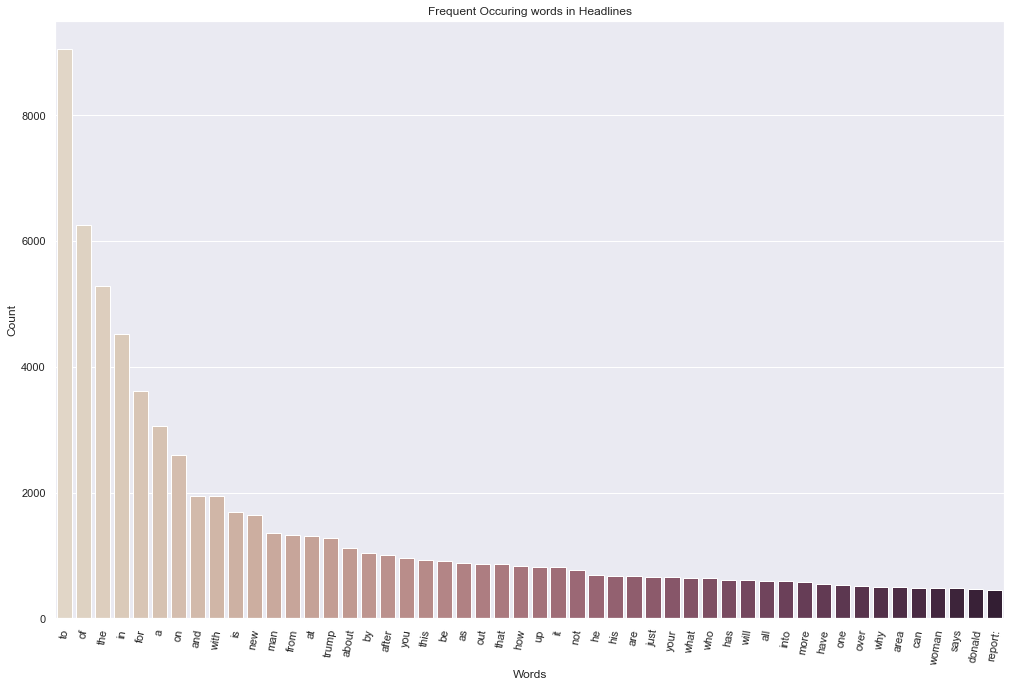

In [14]:
sns.set(rc={'figure.figsize':(17,11)})
sns.barplot(x=all['index'][0:50], y=all[0][0:50], data=all,palette="ch:.25",errcolor='.26')
plt.xlabel('Words')  # Add an x-label to the axes.
plt.ylabel('Count')  # Add a y-label to the axes.
plt.title("Frequent Occuring words in Headlines") 
plt.xticks(rotation=80);

In [15]:
all_words = df['headline'].str.split(expand=True).unstack().value_counts()
all_words

to               9045
of               6252
the              5281
in               4521
for              3617
                 ... 
couples'            1
robbins/pizza       1
breathalyzer        1
fictitious          1
leonard,            1
Length: 38234, dtype: int64

In [16]:
non_sarc=pd.DataFrame(df[df['is_sarcastic']==0]['headline'].str.split(expand=True).unstack().value_counts()).reset_index()
non_sarc

,index,0
0,the,4593
1,to,4065
2,of,2462
3,a,2443
4,in,2417
...,...,...
25016,tailspin,1
25017,november?,1
25018,brainfood,1
25019,traded,1


In [17]:
sarc=pd.DataFrame(df[df['is_sarcastic']==1]['headline'].str.split(expand=True).unstack().value_counts()).reset_index()
sarc

,index,0
0,to,4980
1,of,3790
2,in,2104
3,for,1736
4,on,1286
...,...,...
23923,alpha-bits,1
23924,catty,1
23925,"aside,",1
23926,deviation,1


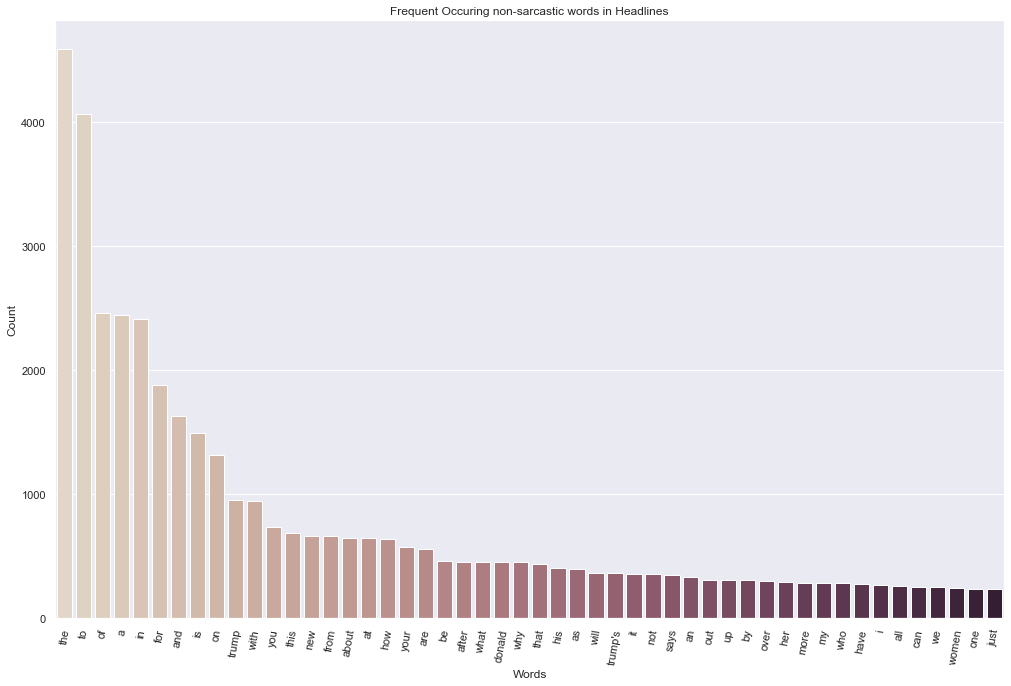

In [18]:
sns.set(rc={'figure.figsize':(17,11)})
sns.barplot(x=non_sarc['index'][0:50], y=non_sarc[0][0:50], data=non_sarc,palette="ch:.25")
plt.xlabel('Words')  # Add an x-label to the axes.
plt.ylabel('Count')  # Add a y-label to the axes.
plt.title("Frequent Occuring non-sarcastic words in Headlines") 
plt.xticks(rotation=80);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'to'),
  Text(1, 0, 'of'),
  Text(2, 0, 'in'),
  Text(3, 0, 'for'),
  Text(4, 0, 'on'),
  Text(5, 0, 'man'),
  Text(6, 0, 'with'),
  Text(7, 0, 'new'),
  Text(8, 0, 'by'),
  Text(9, 0, 'the'),
  Text(10, 0, 'at'),
  Text(11, 0, 'from'),
  Text(12, 0, 'a'),
  Text(13, 0, 'out'),
  Text(14, 0, 'after'),
  Text(15, 0, 'up'),
  Text(16, 0, 'he'),
  Text(17, 0, 'area'),
  Text(18, 0, 'about'),
  Text(19, 0, 'as'),
  Text(20, 0, 'it'),
  Text(21, 0, 'be'),
  Text(22, 0, 'just'),
  Text(23, 0, 'report:'),
  Text(24, 0, 'that'),
  Text(25, 0, 'into'),
  Text(26, 0, 'not'),
  Text(27, 0, 'has'),
  Text(28, 0, 'who'),
  Text(29, 0, 'woman'),
  Text(30, 0, 'all'),
  Text(31, 0, 'trump'),
  Text(32, 0, 'and'),
  Text(33, 0, 'one'),
  Text(34, 0, 'more'),
  Text(3

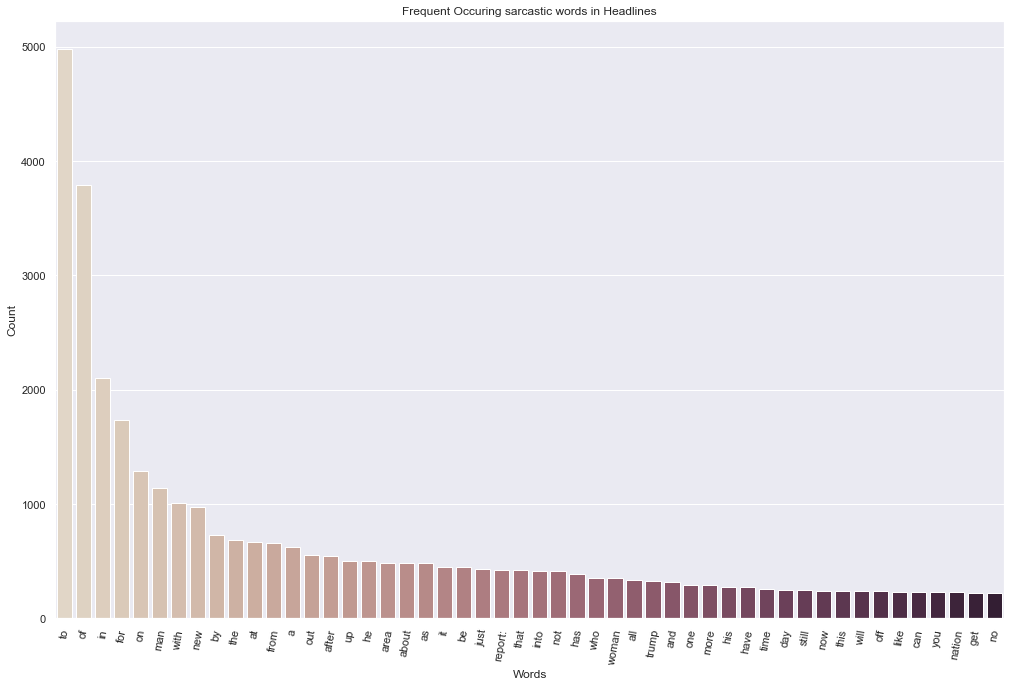

In [19]:
sns.set(rc={'figure.figsize':(17,11)})
sns.barplot(x=sarc['index'][0:50], y=sarc[0][0:50], data=sarc,palette="ch:.25")
plt.xlabel('Words')  # Add an x-label to the axes.
plt.ylabel('Count')  # Add a y-label to the axes.
plt.title("Frequent Occuring sarcastic words in Headlines") 
plt.xticks(rotation=80)

TFIDF


In [20]:
import nltk
from nltk.corpus import wordnet

In [21]:

sar_tokens = df[df['is_sarcastic'] == 1]['headline'].apply(lambda x: nltk.word_tokenize(x)) 
sar_tokens[:10]

0     [thirtysomething, scientists, unveil, doomsday...
3     [inclement, weather, prevents, liar, from, get...
4     [mother, comes, pretty, close, to, using, word...
7     [richard, branson, 's, global-warming, donatio...
8     [shadow, government, getting, too, large, to, ...
14    [ford, develops, new, suv, that, runs, purely,...
16    [area, boy, enters, jumping-and-touching-tops-...
17    [area, man, does, most, of, his, traveling, by...
21    [guard, in, video, game, under, strict, orders...
25    [secret, service, agent, not, so, secret, abou...
Name: headline, dtype: object

In [22]:
nonsar_tokens = df[df['is_sarcastic'] == 0]['headline'].apply(lambda x: nltk.word_tokenize(x))
nonsar_tokens[:10]

1     [dem, rep., totally, nails, why, congress, is,...
2     [eat, your, veggies, :, 9, deliciously, differ...
5                              [my, white, inheritance]
6     [5, ways, to, file, your, taxes, with, less, s...
9             [lots, of, parents, know, this, scenario]
10    [this, lesbian, is, considered, a, father, in,...
11    [amanda, peet, told, her, daughter, sex, is, '...
12    [what, to, know, regarding, current, treatment...
13    [chris, christie, suggests, hillary, clinton, ...
15    [uber, ceo, travis, kalanick, stepping, down, ...
Name: headline, dtype: object

In [23]:
stopwords = nltk.corpus.stopwords.words('english')
sarc_lower=[each_word.lower() for each_word in sarc['index']] #lowcase
sarc_nostop = [word for word in sarc_lower if word not in stopwords]
non_sarc_lower=[each_word.lower() for each_word in non_sarc['index']]
non_sarc_nostop = [word for word in non_sarc_lower if word not in stopwords]

In [24]:
sarc_lower[:5]

['to', 'of', 'in', 'for', 'on']

In [25]:
non_sarc_lower[0:5]

['the', 'to', 'of', 'a', 'in']

#### World Cloud 

In [26]:
#pip install wordcloud

In [27]:
from wordcloud import WordCloud, ImageColorGenerator

ModuleNotFoundError: No module named 'wordcloud'

In [1]:
pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'c:\users\mercernary\appdata\local\programs\python\python39\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Mercernary\\AppData\\Local\\Temp\\pip-install-ru1gv__r\\wordcloud_4b4ea2ec891c45eabf43babae49db954\\setup.py'"'"'; __file__='"'"'C:\\Users\\Mercernary\\AppData\\Local\\Temp\\pip-install-ru1gv__r\\wordcloud_4b4ea2ec891c45eabf43babae49db954\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Mercernary\AppData\Local\Temp\pip-wheel-ks4grn4m'
       cwd: C:\Users\Mercernary\AppData\Local\Temp\pip-install-ru1gv__r\wordcloud_4b4ea2ec891c45eabf43babae49db954\
  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  creating build\lib.win-amd64-3.9\wordcloud
  copy

In [29]:
from wordcloud import WordCloud, ImageColorGenerator

ModuleNotFoundError: No module named 'wordcloud'

In [2]:
pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'c:\users\mercernary\appdata\local\programs\python\python39\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Mercernary\\AppData\\Local\\Temp\\pip-install-hd1c41ve\\wordcloud_e8f8f88e738a4731b65c59d8d27b45f8\\setup.py'"'"'; __file__='"'"'C:\\Users\\Mercernary\\AppData\\Local\\Temp\\pip-install-hd1c41ve\\wordcloud_e8f8f88e738a4731b65c59d8d27b45f8\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Mercernary\AppData\Local\Temp\pip-wheel-zj9o99vx'
       cwd: C:\Users\Mercernary\AppData\Local\Temp\pip-install-hd1c41ve\wordcloud_e8f8f88e738a4731b65c59d8d27b45f8\
  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  creating build\lib.win-amd64-3.9\wordcloud
  copy

In [4]:
import wordcloud

ModuleNotFoundError: No module named 'wordcloud'